In [1]:
import os
import pickle
import numpy as np
import sklearn
import matplotlib.pyplot as plt
data_path = "../data"
eigenvalues = []

# read features we extracted

In [2]:
with open(data_path+"/"+"cluster_eigenvalues.txt",'rb') as rf:
    eigenvalues = pickle.load(rf)
with open(data_path+"/"+"cluster_labels.txt",'rb') as rf:
    pointlabels = pickle.load(rf)

## notice that we follow following assumption in next experiments:
### 1 hyperparameter are independent of each others
### 2 different features are independent of hyperparameter composition(different feature have the similir performance ranks in different hyperparapmeter composition)
### 3 slightly difference during experiment is allowed(each time we randomly split testing set and training set) we just record the experiment in our random seed

# make sure the data type is ndarray

In [3]:
eigenvalues = np.array(eigenvalues)
pointlabels = np.array(pointlabels)
pointslabels = pointlabels.reshape((-1,1))

In [4]:
print(eigenvalues.shape,pointlabels.shape)
print(eigenvalues[0])

(500, 9) (500,)
[ 0.27827399  1.88905807  4.69045837  2.85000038  7.97000122  5.29998779
  4.68545482 -0.10798696  0.06054664]


# load and test model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# test hyper parameter chooose

In [14]:
X_train, X_test, y_train, y_test = train_test_split(eigenvalues, pointlabels, test_size=0.333, random_state=42)


# how we select features: first of all define three features and test its performance, if it is valid(the accuracy is not equal to random selection, which means the accuracy rate is 20%), then continue to add features into feature dimension, until accuray show little increase


In [15]:
# only used at the beginning to decide feature selection
# test on feature selection

clf = svm.SVC(gamma=0.05,kernel = 'rbf',degree = 2,coef0=0.2,C=11)
clf.fit(X_train[:,6:],y_train)
predicted= clf.predict(X_test[:,6:])
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)

# test on 6 feature selection
clf = svm.SVC(gamma=0.05,kernel = 'rbf',degree = 2,coef0=0.2,C=11)
clf.fit(X_train[:,3:9],y_train)
predicted = clf.predict(X_test[:,3:9])
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)

# test on 9 feature selection
clf = svm.SVC(gamma=0.05,kernel = 'rbf',degree = 2,coef0=0.2,C=11)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)

# test feature selection on random forest
clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=0.0046, random_state=10,n_jobs=5)
clf.fit(X_train[:,6:],y_train)
predicted = clf.predict(X_test[:,6:])
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)

clf = RandomForestClassifier(n_estimators=16, min_impurity_decrease=0.0046, random_state=10,n_jobs=5)
clf.fit(X_train[:,3:9],y_train)
predicted = clf.predict(X_test[:,3:9])
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)


clf = RandomForestClassifier(n_estimators=50, min_impurity_decrease=0.0013, random_state=40,n_jobs=5)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
z = metrics.accuracy_score(y_test, predicted)
print("current accuracy" ,z)



current accuracy 0.5449101796407185
current accuracy 0.9041916167664671
current accuracy 0.9221556886227545
current accuracy 0.6047904191616766
current accuracy 0.9281437125748503
current accuracy 0.9401197604790419


In [16]:
#all possible kernel provided by SKLEARN

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_performance={'linear':[], 'poly':[], 'rbf':[],'sigmoid':[]}
kernel_parameter={'linear':{'gamma':0.05,"C":1,"degree":2,"coef0":3}, \
                  'poly':{'gamma':0.05,"C":1,"degree":2,"coef0":3},\
                  'rbf':{'gamma':0.05,"C":1,"degree":2,"coef0":3},\
                  'sigmoid':{'gamma':0.05,"C":1,"degree":2,"coef0":3}}

0.9281437125748503 0.9 linear
0.8982035928143712 0.7000000000000001 poly
0.9221556886227545 10.3 rbf
0 5 sigmoid


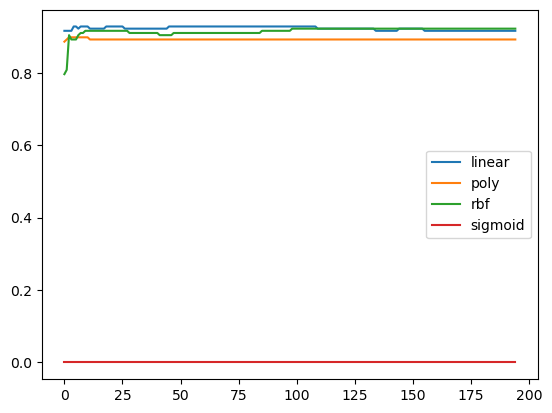

In [17]:

for kernel in kernels:
    max_accuracy = 0
    c = 5
    for i in range(5,200):
        #print(i)
        clf = svm.SVC(C=i*0.1,gamma=0.05,kernel = kernel,degree = 5,coef0=0.2)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i*0.1
            


    
        kernel_performance[kernel].append(z)
    kernel_parameter[kernel]["C"]=c

    print(max_accuracy,c,kernel)  
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
   

0.9281437125748503 0.003 rbf
0.8982035928143712 0.05 poly


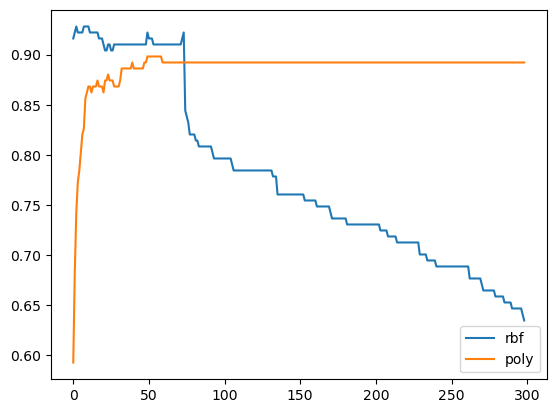

In [18]:
kernels = ['rbf','poly']
kernel_performance={ 'rbf':[],'poly':[]}

for kernel in kernels:
    max_accuracy = 0
    c = 0
    for i in range(1,300):
        
        clf = svm.SVC(gamma=i*0.001,kernel = kernel,degree = 5,coef0=0.2,C=kernel_parameter[kernel]["C"])
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i*0.001
            
        kernel_performance[kernel].append(z)
    kernel_parameter[kernel]['gamma']=c
    print(max_accuracy,c,kernel)  
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
 

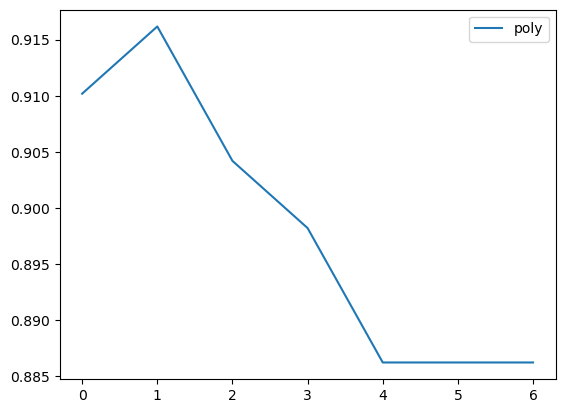

0.9161676646706587 2


In [19]:

kernels = ['poly']
kernel_performance={'linear':[], 'poly':[],'sigmoid':[]}
for kernel in kernels:
    max_accuracy = 0
    c = 0
    for i in range(1,8):
        clf = svm.SVC(C=kernel_parameter[kernel]["C"],\
                      kernel = kernel,gamma=kernel_parameter[kernel]["gamma"],\
                      degree =i)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
        kernel_performance[kernel].append(z)
    kernel_parameter[kernel]['degree']=c
    
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)  

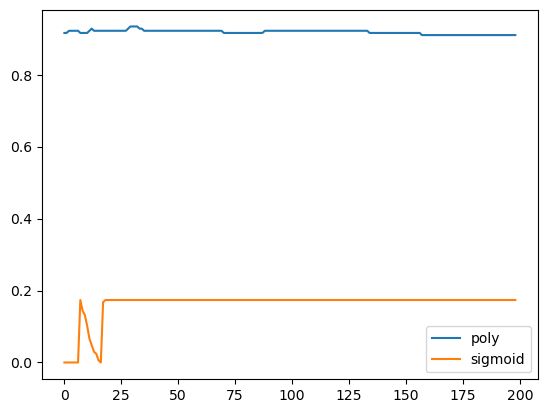

0.9341317365269461 30


In [20]:
max_accuracy = 0
c = 0
kernels = ['poly','sigmoid']
kernel_performance={'poly':[],'sigmoid':[]}
for kernel in kernels:
    for i in range(1,200):
        clf = svm.SVC(C=kernel_parameter[kernel]["C"],\
                      kernel = kernel,gamma=kernel_parameter[kernel]["gamma"],\
                      degree =kernel_parameter[kernel]["degree"],coef0=i)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
        kernel_performance[kernel].append(z)
    kernel_parameter[kernel]['coef0']=c
for kernel in kernels:
    plt.plot(kernel_performance[kernel], label=kernel)

plt.legend()
plt.show()
print(max_accuracy,c)  

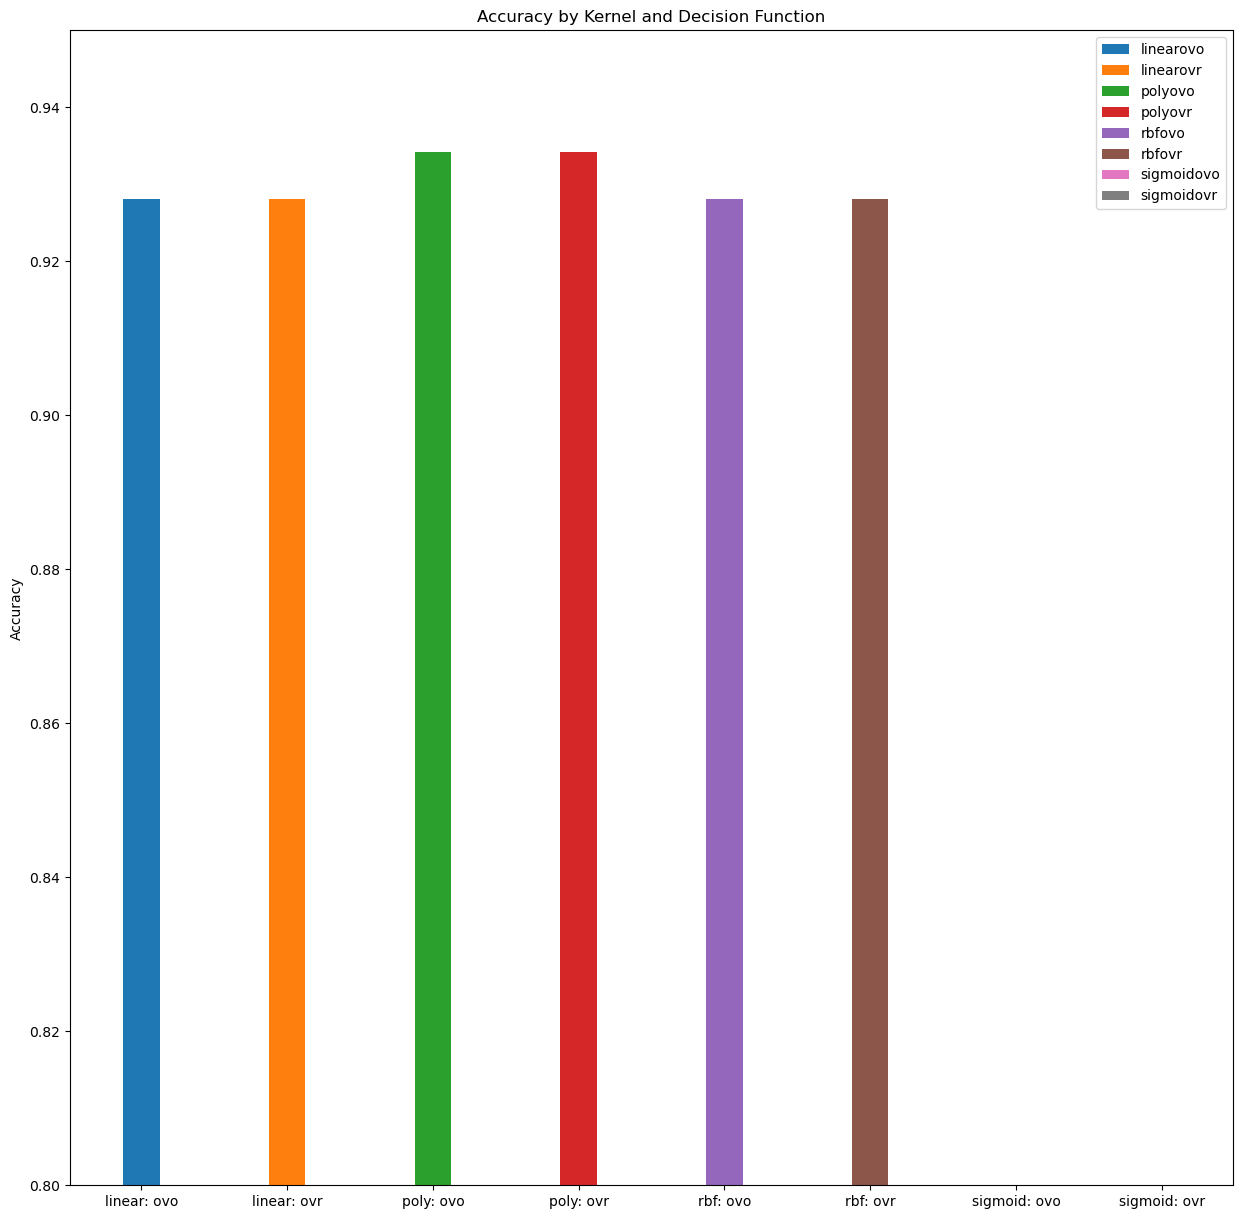

0.9341317365269461 ovo poly {'gamma': 0.05, 'C': 0.7000000000000001, 'degree': 2, 'coef0': 30}


In [22]:
max_accuracy = 0
c = 0
best_kernel = 'linear'
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_performance={'linear':[], 'poly':[], 'rbf':[],'sigmoid':[]}
for kernel in kernels:
    for i in ['ovo','ovr']:
        clf = svm.SVC(C=kernel_parameter[kernel]["C"],\
                      kernel = kernel,gamma=kernel_parameter[kernel]["gamma"],\
                      degree =kernel_parameter[kernel]["degree"],coef0=kernel_parameter[kernel]["coef0"])
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        if z > max_accuracy:
            max_accuracy = z
            c = i
            best_kernel=kernel
        kernel_performance[kernel].append(z)
        


x = np.arange(len(kernels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,15))
for i, kernel in enumerate(kernels):
    ax.bar(kernel+': ovo', kernel_performance[kernel][0], width, label=kernel+'ovo')
    ax.bar(kernel+': ovr', kernel_performance[kernel][1], width, label=kernel+'ovr')
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Kernel and Decision Function')


ax.legend()
ax.set_ylim(0.8,0.95)
plt.show()
print(max_accuracy,c,best_kernel,kernel_parameter[best_kernel])   

# conclusion
## the poly kernel performs best
## sigmoid performance worst, not suitable to be a kernel
## details see
{'linear': {'gamma': 0.05, 'C': 0.9, 'degree': 2, 'coef0': 3}, 'poly': {'gamma': 0.05, 'C': 0.7000000000000001, 'degree': 2, 'coef0': 30}, 'rbf': {'gamma': 0.003, 'C': 10.3, 'degree': 2, 'coef0': 3}, 'sigmoid': {'gamma': 0.05, 'C': 5, 'degree': 2, 'coef0': 30}}

In [23]:
clf = svm.SVC(C=kernel_parameter[best_kernel]["C"],\
                      kernel = best_kernel,gamma=kernel_parameter[best_kernel]["gamma"],\
                      degree =kernel_parameter[best_kernel]["degree"],\
              coef0=kernel_parameter[best_kernel]["coef0"])
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=0.7000000000000001, coef0=30, degree=2, gamma=0.05, kernel='poly'):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.91      1.00      0.95        29
           2       0.94      0.92      0.93        37
           3       0.97      0.84      0.90        38
           4       0.89      0.97      0.93        34

    accuracy                           0.93       167
   macro avg       0.94      0.94      0.94       167
weighted avg       0.94      0.93      0.93       167




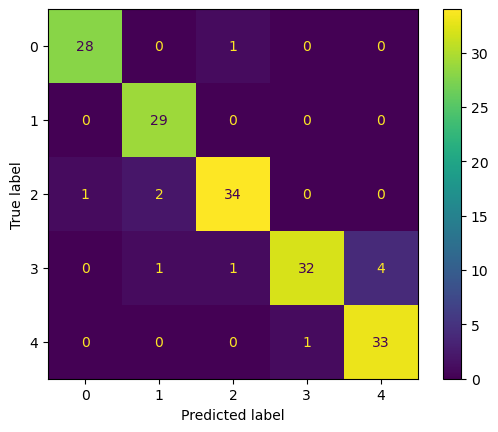

In [24]:

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

# Learning curve on different kernel on svm

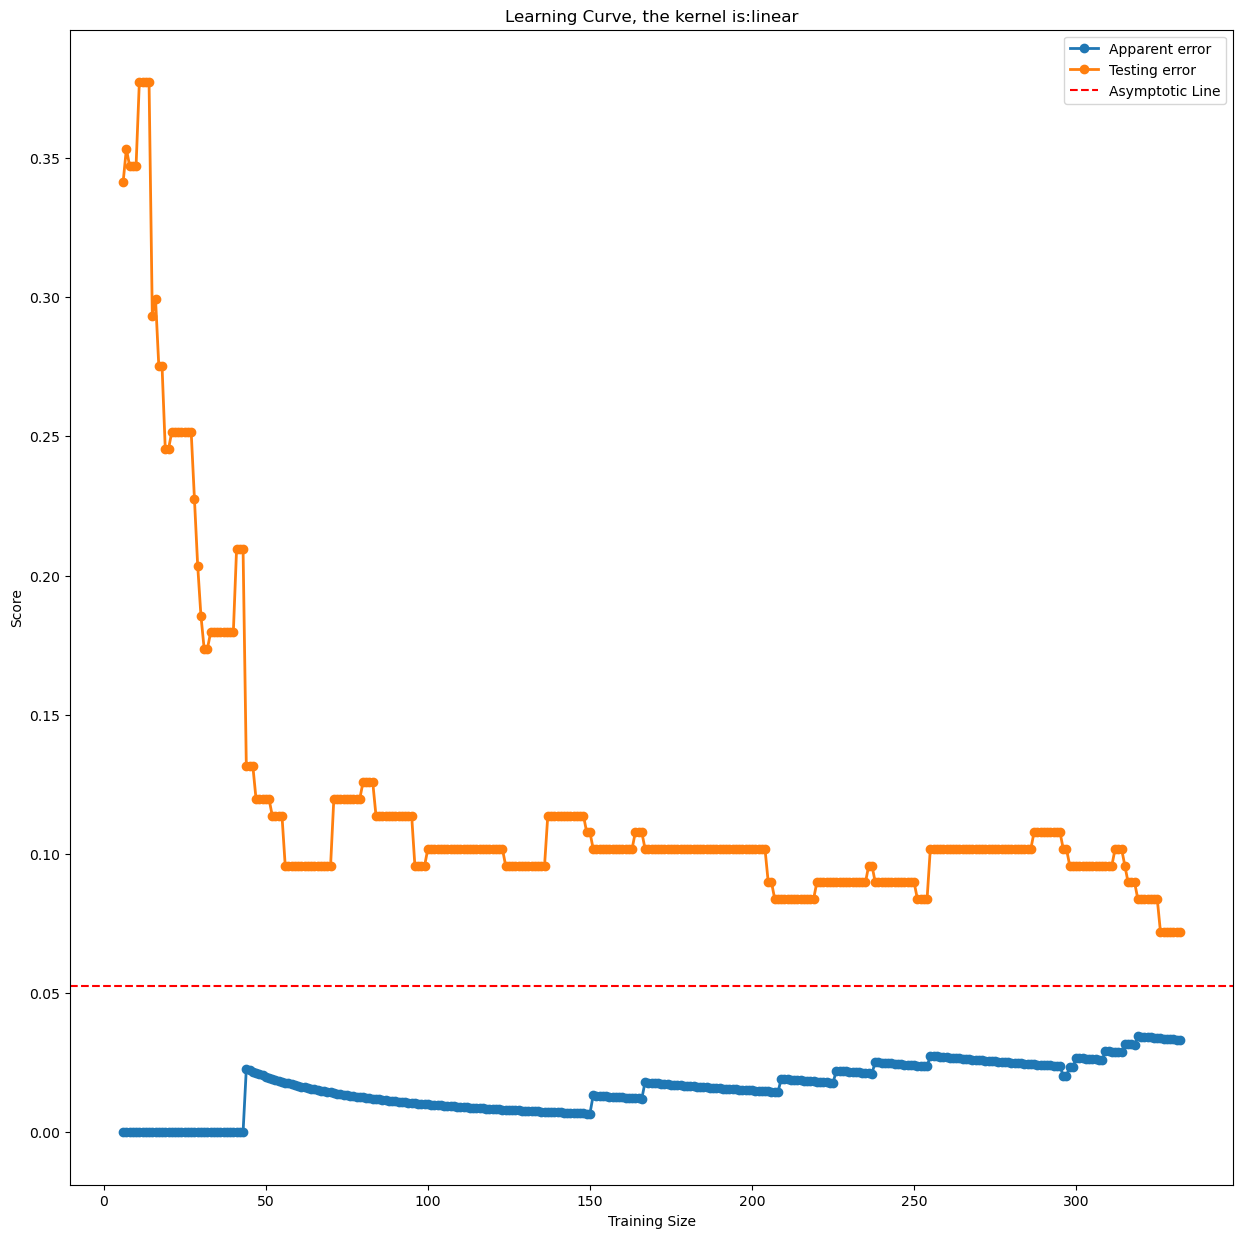

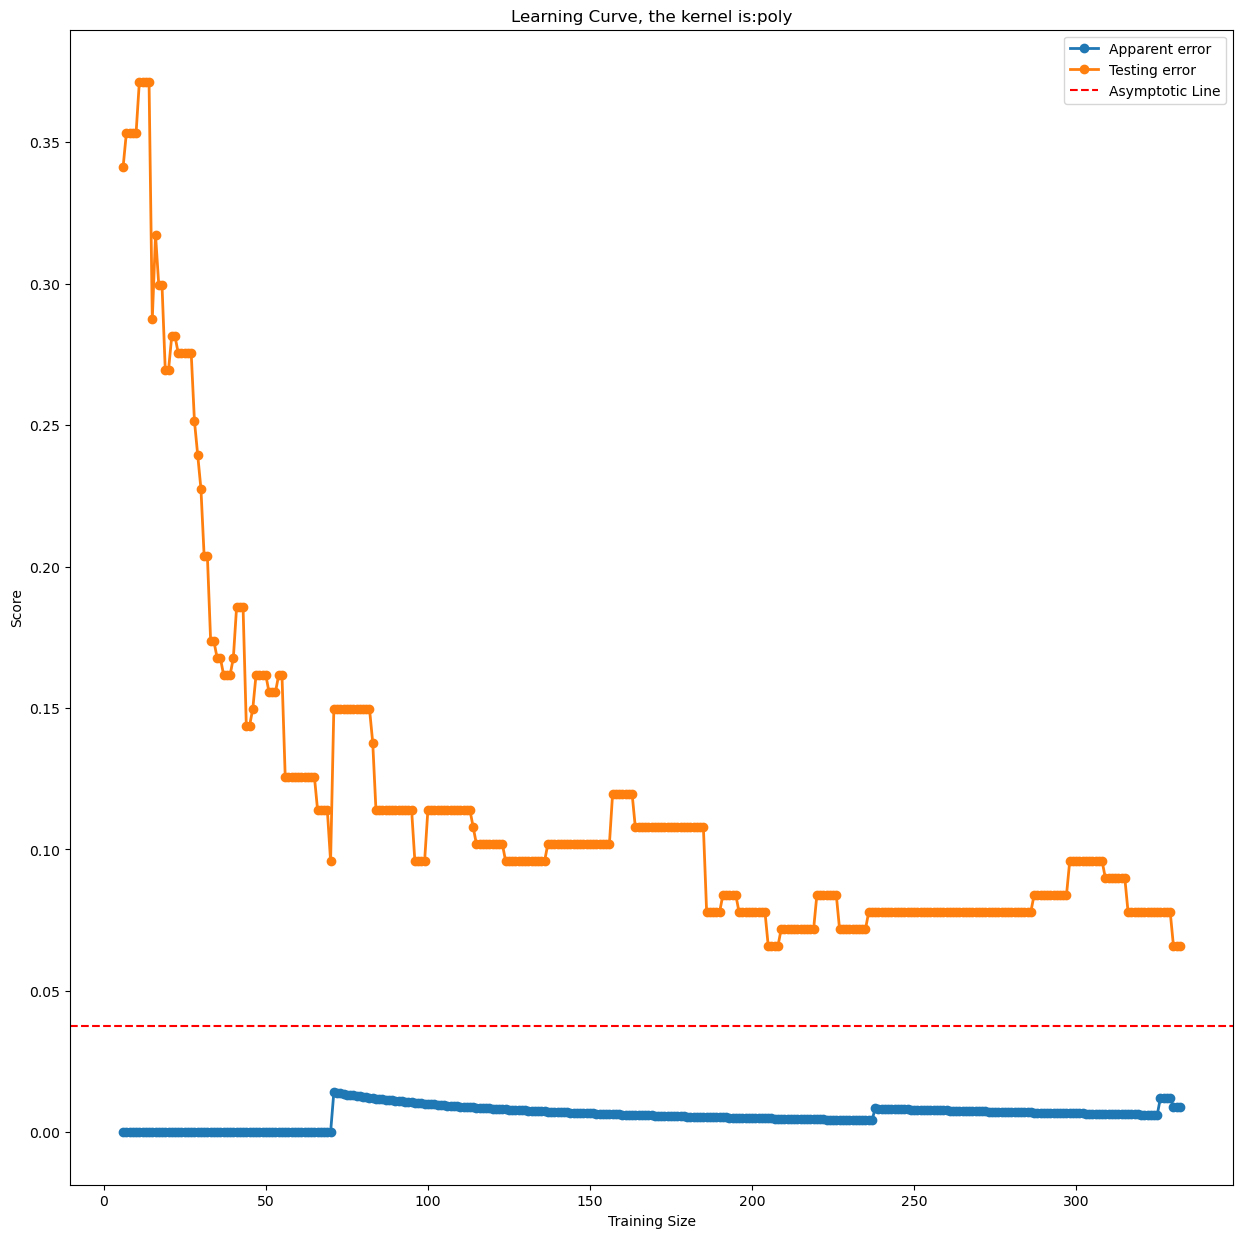

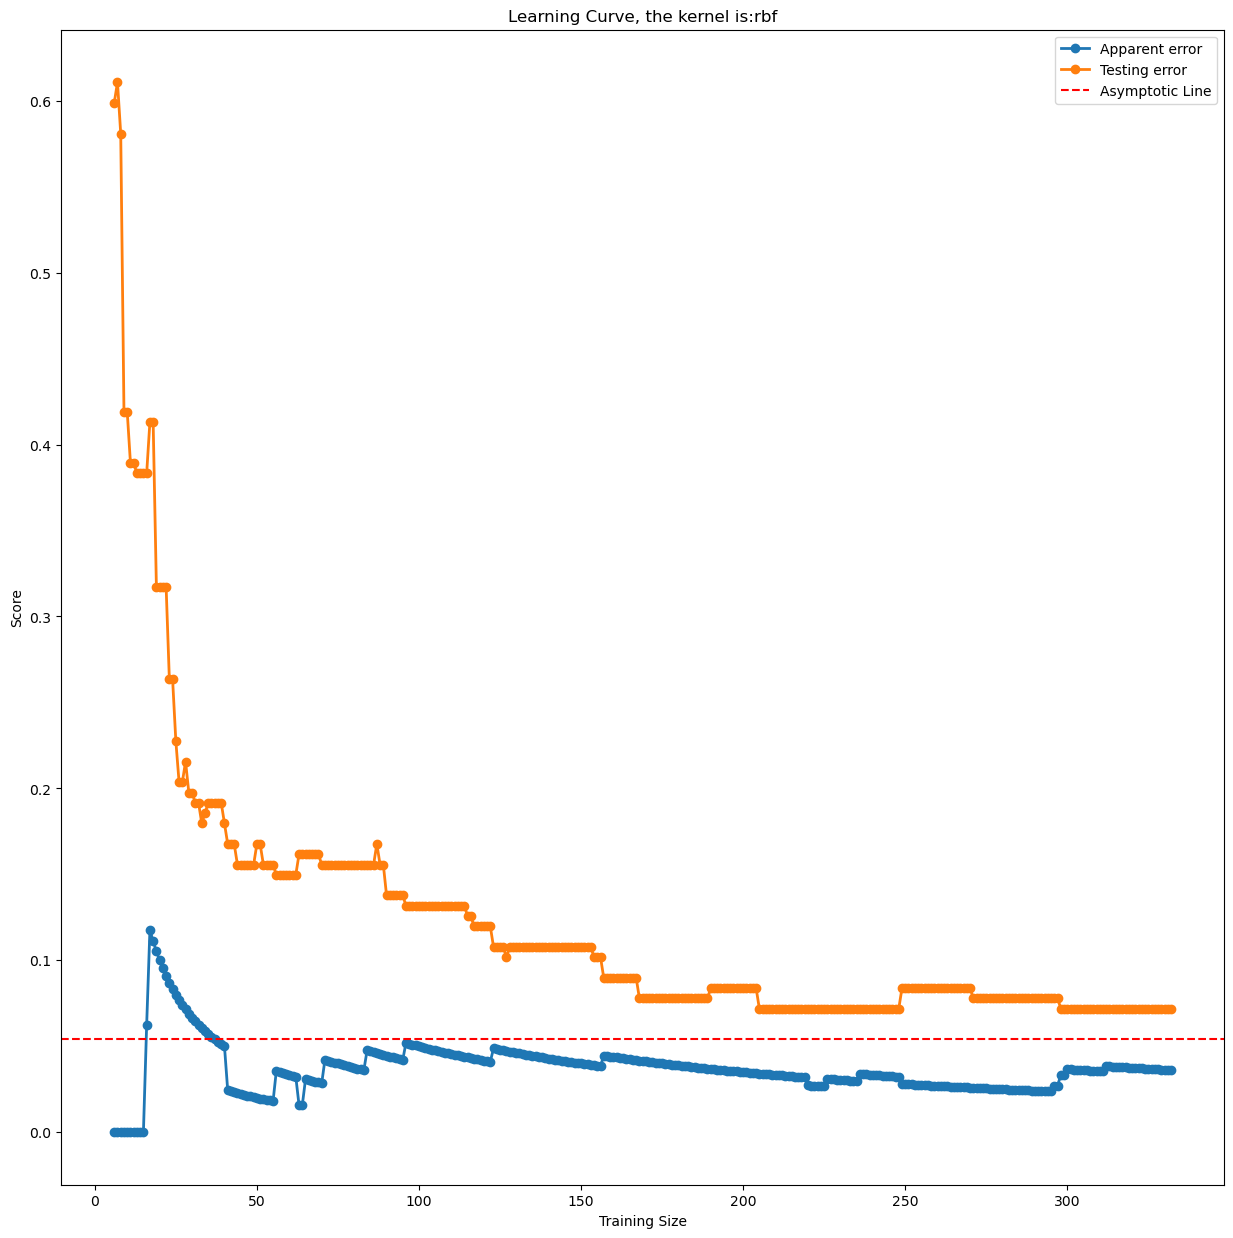

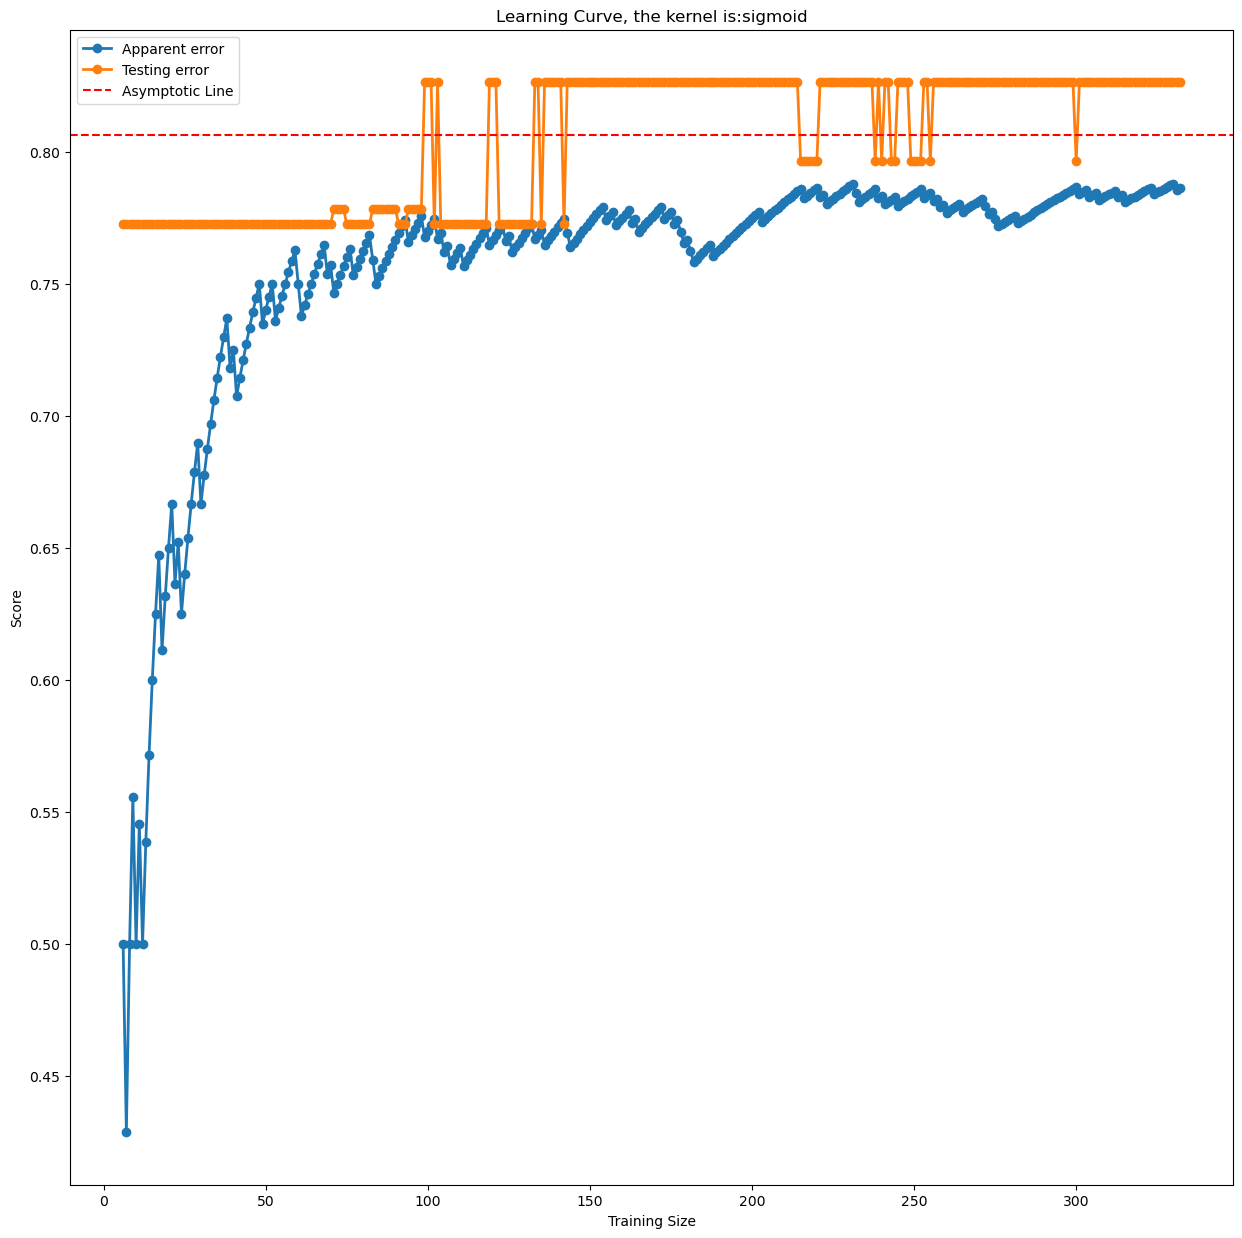

In [25]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

 # your list of testing scores
for kernel in kernels:
    train_sizes = [] # your list of training sizes
    train_scores = [] # your list of training scores
    test_scores = []
    for i in range(6,len(X_train)):
        clf = svm.SVC(C=kernel_parameter[kernel]["C"],\
                      kernel = kernel,gamma=kernel_parameter[kernel]["gamma"],\
                      degree =kernel_parameter[kernel]["degree"],\
              coef0=kernel_parameter[kernel]["coef0"],decision_function_shape='ovo')
        x_train = X_train[:i]
        y_train_partial =y_train[:i] 
        clf.fit(x_train, y_train_partial)
        predicted = clf.predict(x_train)
        z = metrics.accuracy_score(y_train_partial, predicted)
        train_sizes.append(i)
        train_scores.append(z)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        test_scores.append(z)
    train_scores= np.array(train_scores)
    test_scores=np.array(test_scores)
    fig = plt.figure(figsize=(15,15))
    plt.plot(train_sizes, 1-train_scores, 'o-', label="Apparent error", linewidth=2)
    plt.plot(train_sizes, 1-test_scores, 'o-', label="Testing error", linewidth=2)

    plt.axhline(y=(1-test_scores[-1])/2+(1-train_scores[-1])/2, color='r', linestyle='--', label="Asymptotic Line")

    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.title("Learning Curve, the kernel is:"+kernel)
    plt.legend(loc="best")

    plt.show()  

# do cross validation

In [28]:


clf = svm.SVC(C=kernel_parameter[best_kernel]["C"],\
                      kernel = best_kernel,gamma=kernel_parameter[best_kernel]["gamma"],\
                      degree =kernel_parameter[best_kernel]["degree"],\
              coef0=kernel_parameter[best_kernel]["coef0"])
scores = cross_val_score(clf, eigenvalues, pointlabels, cv=5)
print(scores.mean())

0.9259999999999999


# move to random forest

## hyperparameter selection
### notice that the random forest is not a stable model in different experiments, so the hyprparameter may be different from what we hanve mentioned in the paper, but the final accurarcy will almost the same
### this is a difference between svm and random forest, because decision tree is very unstable, slightly change on sample or training set will change the model,so each time we split the training and testiing set from data set different randomness will change the model
### but the ensemble model put many classifiers together, counteract such effect, in the meantime svm is a liner model which is very stable, in multipie experiments, the hyperparameter may be the same

### n_estimators's hyperparameter test

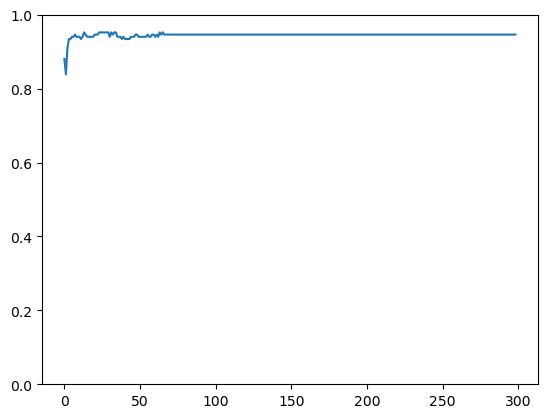

0.9520958083832335 14


In [32]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,300):
    
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=2, random_state=42,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.ylim(top = 1, bottom=0)
plt.plot(x_scores)
plt.show()

print(max_accuracy,c)

##  min_impurity_decrease's experiment

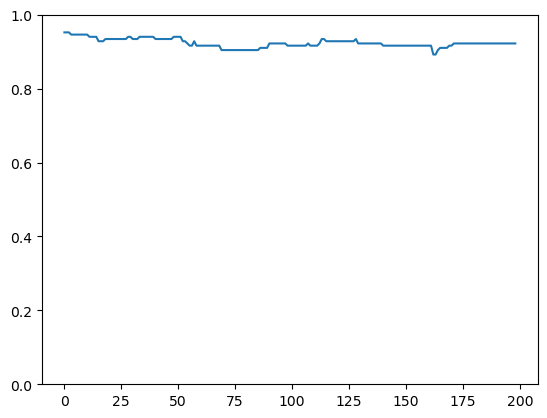

0.9520958083832335 1


In [39]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,200):
    clf = RandomForestClassifier(n_estimators=14, min_impurity_decrease=i*0.0001, random_state=42,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.ylim(top = 1, bottom=0)
plt.plot(x_scores)
plt.show()
print(max_accuracy,c)

## random state test this part is only test the performance on different random state and result show that it is stable

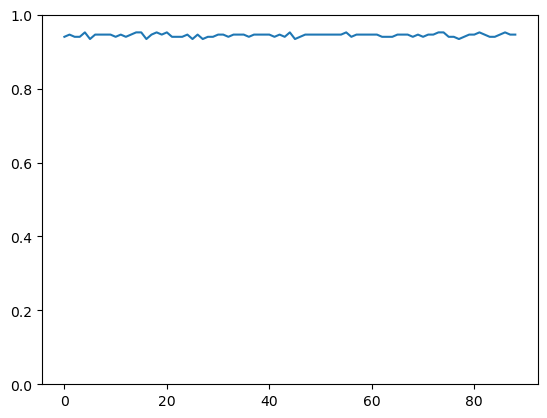

0.9520958083832335 5


In [41]:
x_scores = []
max_accuracy = 0
c = 0
for i in range(1,90):
    clf = RandomForestClassifier(n_estimators=50, min_impurity_decrease=0.0001, random_state=i,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.ylim(top = 1, bottom=0)
plt.plot(x_scores)
plt.show()
print(max_accuracy,c)

## test on different criterion(gini/cross entropy)

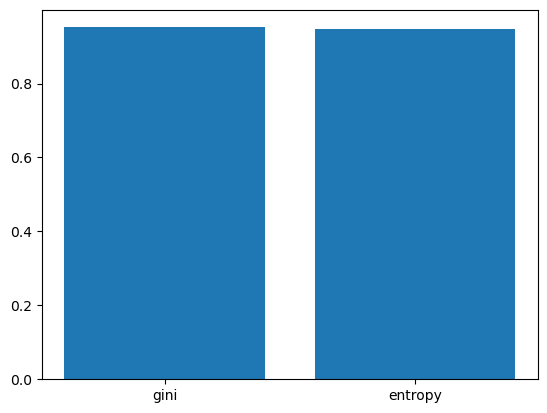

0.9520958083832335 gini


In [42]:
x_scores = []
max_accuracy = 0
c = 0
for i in ["gini", "entropy"]:
    clf = RandomForestClassifier(n_estimators=14,criterion=i, min_impurity_decrease=0.0001, random_state=42,n_jobs=5)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    z = metrics.accuracy_score(y_test, predicted)
    if z > max_accuracy:
        max_accuracy = z
        c = i


    x_scores.append(z)
plt.bar(["gini", "entropy"],x_scores)
plt.show()
print(max_accuracy,c)

# LEARNING CURVE AND CROSS VALIDATION on RF

## cross validation(to keep coherent with our paper, we use the same hyperparameter in the experiment the same as what we done in the paper, but the accurarcy will be slightly different(small to omit))

In [43]:
clf = RandomForestClassifier(n_estimators=14,criterion='gini', min_impurity_decrease=0.0001, random_state=42,n_jobs=5)
scores = cross_val_score(clf, eigenvalues, pointlabels, cv=5)
print(scores.mean())

0.9360000000000002


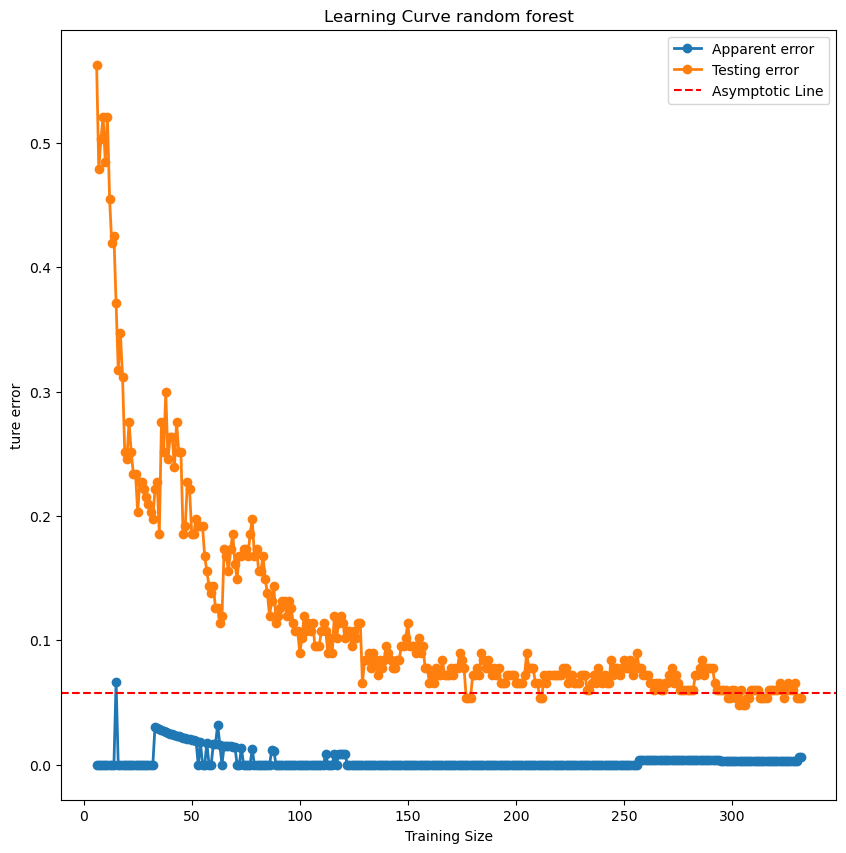

In [45]:
clf = RandomForestClassifier(n_estimators=14, min_impurity_decrease=0.0001, random_state=42,n_jobs=5)
train_sizes = [] # your list of training sizes
train_scores = [] # your list of training scores
test_scores = []
for i in range(6,len(X_train)):
        
        x_train = X_train[:i]
        y_train_partial =y_train[:i] 
        clf.fit(x_train, y_train_partial)
        predicted = clf.predict(x_train)
        z = metrics.accuracy_score(y_train_partial, predicted)
        train_sizes.append(i)
        train_scores.append(z)
        predicted = clf.predict(X_test)
        z = metrics.accuracy_score(y_test, predicted)
        test_scores.append(z)
train_scores= np.array(train_scores)
test_scores=np.array(test_scores)
fig = plt.figure(figsize=(10,10))
plt.plot(train_sizes, 1-train_scores, 'o-', label="Apparent error", linewidth=2)
plt.plot(train_sizes, 1-test_scores, 'o-', label="Testing error", linewidth=2)

plt.axhline(y=min(1-test_scores)/2+max(1-train_scores)/2, color='r', linestyle='--', label="Asymptotic Line")

plt.xlabel("Training Size")
plt.ylabel("ture error")
plt.title("Learning Curve "+"random forest")
plt.legend(loc="best")

plt.show() 

Classification report for classifier RandomForestClassifier(min_impurity_decrease=0.0001, n_estimators=14, n_jobs=5,
                       random_state=42):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.97      1.00      0.98        29
           2       0.95      0.97      0.96        37
           3       0.97      0.89      0.93        38
           4       0.89      0.97      0.93        34

    accuracy                           0.95       167
   macro avg       0.96      0.95      0.95       167
weighted avg       0.95      0.95      0.95       167




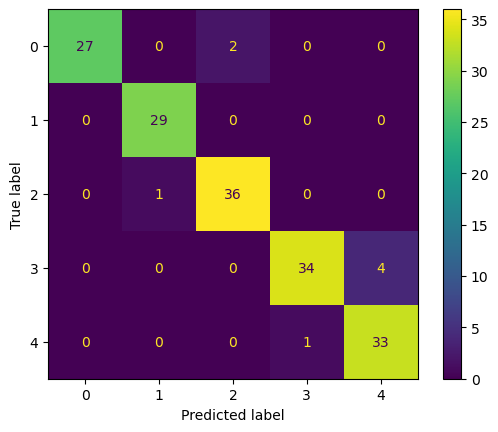

In [46]:
clf = RandomForestClassifier(n_estimators=14, min_impurity_decrease=0.0001, random_state=42,n_jobs=5)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)


predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()